In [1]:
import warnings
warnings.filterwarnings(action='ignore')
%config Completer.use_jedi = False

계층 클러스터링(Hierarchical Clustering)  
계층 클러스터링 알고리즘은 데이터 간 계층을 기반으로 데이터 간 병합 또는 분할을 통해서 해당 데이터 포인트가 속할 그룹을 결정한다. 계층 클러스터링은 크게 병합 계층 클러스터링(Agglomerative Hierarchical Clustering)과 분할 계층 클러스터링(Division Hierarchical Clustering)으로 나눌 수 있다.

병합 계층 클러스터링은 개별 데이터 포인트를 하나의 클러스터로 설정하고 시작하는 방법으로 데이터 포인트가 100개 있다면 100개의 클러스터가 존재한다고 설정하는 것이다. 그리고 각 클러스터를 비교해서 클러스터간 유사도가 높을 경우 두 개의 클러스터를 하나의 클러스터로 합치는 방법이다. 처음에는 다수의 클러스터로 시작하지만 결국에는 데이터셋 전체가 하나의 클러스터로 묶이는 방법이다.

분할 계층 클러스터링은 병합 계층 클러스터링과는 반대로 전체 데이터셋을 하나의 클러스터로 설정하고 시작하는 방법으로 데이터 포인트가 100개 있을 때, 이 데이터셋 전체를 1개의 클러스터라고 설정하는 것이다. 그 이후, 클러스터 내부에서 가장 멀리 떨어진 데이터를 다른 클러스터로 분리하는 방법이다. 이런 과정을 반복해서 처음에는 1개의 클러스토 시작했지만 마지막에는 클러스터가 데이터의 개수만큼 분리되는 방법이다.

계층 클러스터링 알고리즘을 활용해 주어진 데이터를 클러스터링해 본다.

In [2]:
# 데이터 불러오기
from sklearn import datasets # 사이킷런이 제공하는 데이터셋을 사용하기 위해 import 한다.
X, y = datasets.make_blobs(n_samples=100, n_features=2, centers=6, random_state=10) # 클러스터링용 가상 데이터를 만든다.
print(X.shape, y.shape)

(100, 2) (100,)


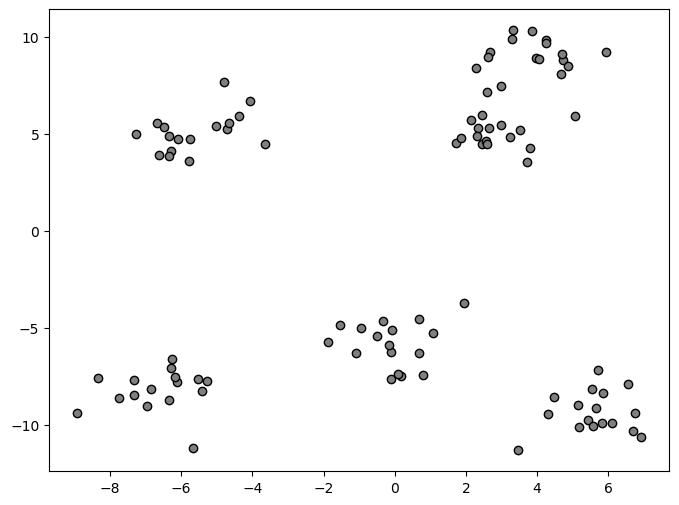

In [3]:
# 라벨링되지 않은 데이터 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=[8, 6])
plt.scatter(X[:, 0], X[:, 1], c='gray', edgecolors='black', marker='o')
plt.show()

In [4]:
# 계층 클러스터링 모델 생성 후 데이터 학습
from sklearn.cluster import AgglomerativeClustering # 병합 계층 클러스터링에 사용하기 위해 import 한다.
# n_clusters 속성으로 클러스터의 개수를 지정한다. 기본값은 2이다.
# 각 데이터 포인트가 하나의 클러스터를 구성하는 단계를 보고싶으면 n_clusters 속성값을 None로 지정하면 되는데
# 반드시 distance_threshold 속성값을 0으로 지정해야 한다.
# linkage 속성으로 거리 측정 방법을 지정하고 속성값에 따른 기능은 아래와 같고 기본값은 ward이다.
# ward: 병합되는 클러스터들의 분산을 최소화 한다. 최소 분산 방법
# single: 모든 데이터 조합에 대해 거리를 측정해서 가장 작은 값을 구한다. 최소 거리 방법
# complete: 모든 데이터 조합에 대해 거리를 측정해서 가장 큰 값을 구한다. 최장 거리 방법
# average: 모든 데이터 조합에 대해 거리를 측정해서 평균 값을 구한다. 평균 거리 방법
agg = AgglomerativeClustering(n_clusters=None, distance_threshold=0, linkage='complete') # 병합 계층 클러스터링 모델을 만든다.
agg.fit(X) # 트레이닝 피쳐 데이터 X를 모델에 넣어서 병합 계층 클러스터링 알고리즘을 학습시킨다.

AgglomerativeClustering(distance_threshold=0, linkage='complete',
                        n_clusters=None)

In [5]:
# 클러스터링 결과(레이블)를 확인한다.
# AgglomerativeClustering는 predict() 메소드가 제공되지 않아서 fit_predict() 메소드를 사용해야 한다.
label_agg = agg.fit_predict(X)
print(label_agg)

[88 57 75 93 80 92 69 59 76 77 72 99 91 63 82 71 37 66 55 94 81 60 67 35
 87 61 46 83 73 98 54 84 41 62 65 56 43 68 78 64 97 27 49 58 33 52 48 53
 28 38 50 74 79 90 29 95 85 13 96 70 45 34 22 16 40 32 47 86 36 18 30 23
 31 42 26 17 51 39 89 24 25 44 19 21 10 12  8 15 20 11 14  7  9  5  6  3
  4  2  1  0]


In [6]:
# 클러스터 4개로 병합
from sklearn.cluster import AgglomerativeClustering
agg2 = AgglomerativeClustering(n_clusters=4, linkage='complete')
label_agg2 = agg2.fit_predict(X)
print(label_agg2)

[3 1 2 2 0 2 0 0 0 3 1 2 0 3 0 2 1 0 0 0 0 2 3 2 2 2 3 1 0 0 0 3 3 0 3 3 1
 1 3 1 0 0 1 0 0 1 1 3 0 1 0 1 0 3 1 0 0 3 1 0 2 1 1 0 3 2 1 1 1 0 1 1 2 0
 0 2 3 3 1 0 3 2 2 0 0 1 0 1 1 0 1 0 1 1 1 2 1 1 1 1]


In [7]:
# 클러스터 5개로 병합
from sklearn.cluster import AgglomerativeClustering
agg3 = AgglomerativeClustering(n_clusters=5, linkage='complete')
label_agg3 = agg3.fit_predict(X)
print(label_agg3)

[3 0 2 2 1 2 4 4 1 3 0 2 1 3 1 2 0 4 1 4 4 2 3 2 2 2 3 0 1 4 4 3 3 1 3 3 0
 0 3 0 4 4 0 4 1 0 0 3 1 0 1 0 1 3 0 1 1 3 0 4 2 0 0 4 3 2 0 0 0 1 0 0 2 4
 1 2 3 3 0 4 3 2 2 1 1 0 4 0 0 4 0 4 0 0 0 2 0 0 0 0]


클러스터링된 데이터 시각화

In [8]:
import pandas as pd
agg_columns = ['agg_comp1', 'agg_comp2']
X_agg_df = pd.DataFrame(X, columns=agg_columns)
X_agg_df['target'] = y
X_agg_df['label_agg2'] = label_agg2 # 데이터프레임에 4개로 클러스터링된 라벨을 결합한다.
X_agg_df['label_agg3'] = label_agg3 # 데이터프레임에 5개로 클러스터링된 라벨을 결합한다.
X_agg_df

,agg_comp1,agg_comp2,target,label_agg2,label_agg3
0,-6.086784,4.729827,3,3,3
1,3.801750,4.278268,1,1,0
2,-7.330583,-8.494063,4,2,2
3,-6.107069,-7.818906,4,2,2
4,5.525562,-8.186965,0,0,1
...,...,...,...,...,...
95,-6.950884,-9.024594,4,2,2
96,2.591843,4.446782,1,1,0
97,2.992321,5.436981,1,1,0
98,2.310466,4.854172,1,1,0


In [9]:
# 타겟 클래스와 클러스터링 라벨의 종류 확인
print(set(X_agg_df.target), set(X_agg_df.label_agg2), set(X_agg_df.label_agg3))

{0, 1, 2, 3, 4, 5} {0, 1, 2, 3} {0, 1, 2, 3, 4}


실제 타겟 데이터 시각화

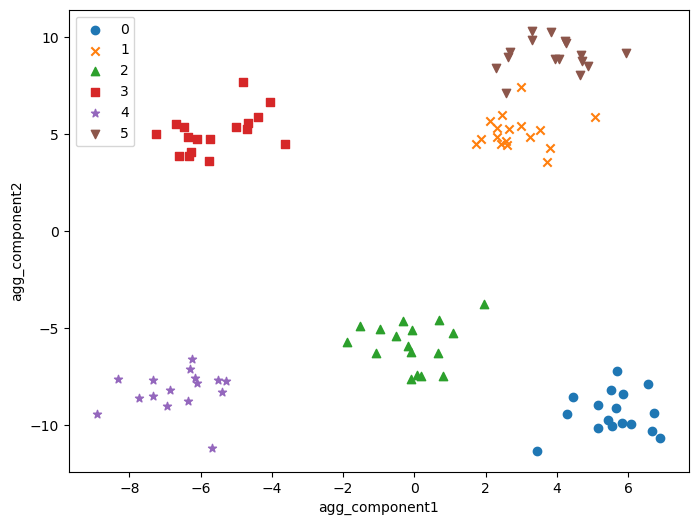

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=[8, 6])
markers = ['o', 'x', '^', 's', '*', 'v']

for index, marker in enumerate(markers):
    df_index = X_agg_df[X_agg_df.target == index]
    target_index = index
    X1 = df_index.agg_comp1
    X2 = df_index.agg_comp2
    plt.scatter(X1, X2, marker=marker, label=target_index)

plt.xlabel('agg_component1')
plt.ylabel('agg_component2')
plt.legend()
plt.show()

병합 계층 클러스터링 적용 데이터 시각화

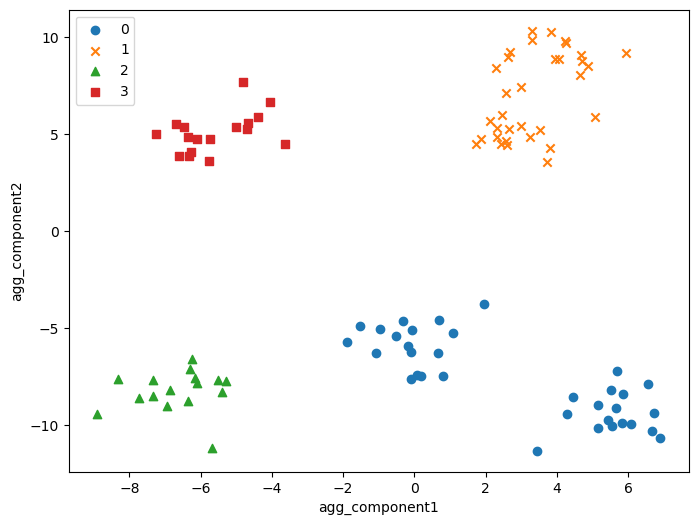

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=[8, 6])
markers = ['o', 'x', '^', 's']

for index, marker in enumerate(markers):
    df_index = X_agg_df[X_agg_df.label_agg2 == index]
    target_index = index
    X1 = df_index.agg_comp1
    X2 = df_index.agg_comp2
    plt.scatter(X1, X2, marker=marker, label=target_index)

plt.xlabel('agg_component1')
plt.ylabel('agg_component2')
plt.legend()
plt.show()

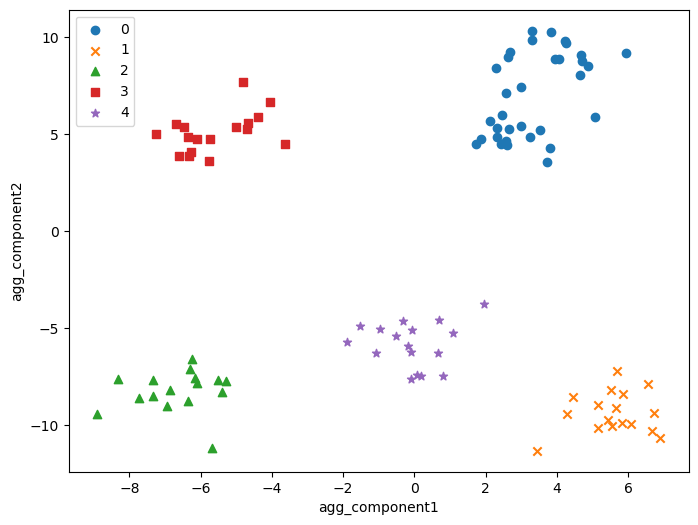

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=[8, 6])
markers = ['o', 'x', '^', 's', '*']

for index, marker in enumerate(markers):
    df_index = X_agg_df[X_agg_df.label_agg3 == index]
    target_index = index
    X1 = df_index.agg_comp1
    X2 = df_index.agg_comp2
    plt.scatter(X1, X2, marker=marker, label=target_index)

plt.xlabel('agg_component1')
plt.ylabel('agg_component2')
plt.legend()
plt.show()

덴드로그램(Dendrogram) 시각화  
계층적 클러스터링 결과를 트리 구조로 나타낸 그림을 덴드로그램이라 한다.

In [13]:
from sklearn import datasets
XX, yy = datasets.make_blobs(n_samples=10, n_features=2, random_state=10)
print(XX.shape, yy.shape)

from sklearn.cluster import AgglomerativeClustering
agg4 = AgglomerativeClustering(n_clusters=None, distance_threshold=0, linkage='complete')
label_agg4 = agg4.fit_predict(XX)
print(label_agg4)

(10, 2) (10,)
[9 7 8 6 5 3 4 2 1 0]


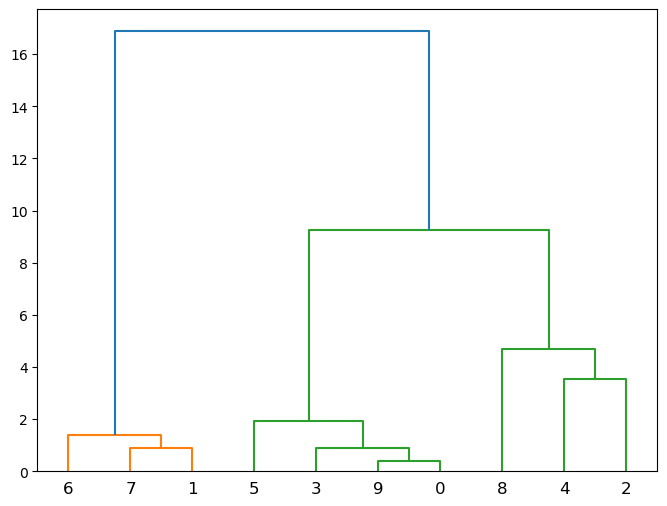

In [14]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
import matplotlib.pyplot as plt

plt.figure(figsize=[8, 6])
linked = linkage(XX, 'complete')
dendrogram(linked, orientation='top', labels=label_agg4, show_leaf_counts=True)
plt.show()

In [16]:
# 실루엣 스코어
from sklearn.metrics import silhouette_score # 실루엣 스코어 알고리즘을 사용하기 위해 import 한다.
# silhouette_score() 메소드에 피처 데이터(X)와 군집화 결과로 얻은 레이블(label_agg2)을 넘겨 실루엣 스코어를 평가한다.
sil_score = silhouette_score(X, label_agg2)
print(sil_score)

0.660300244760271


In [19]:
# silhouette_score() 메소드에 피처 데이터(X)와 군집화 결과로 얻은 레이블(label_agg3)을 넘겨 실루엣 스코어를 평가한다.
sil_score = silhouette_score(X, label_agg3)
print(sil_score)

0.7209801012404234
